# Load data

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.Series()
df['raw'] = pd.read_csv('./data/movie_metadata.csv')
df['raw'].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Pre processing

In [3]:
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))

Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%


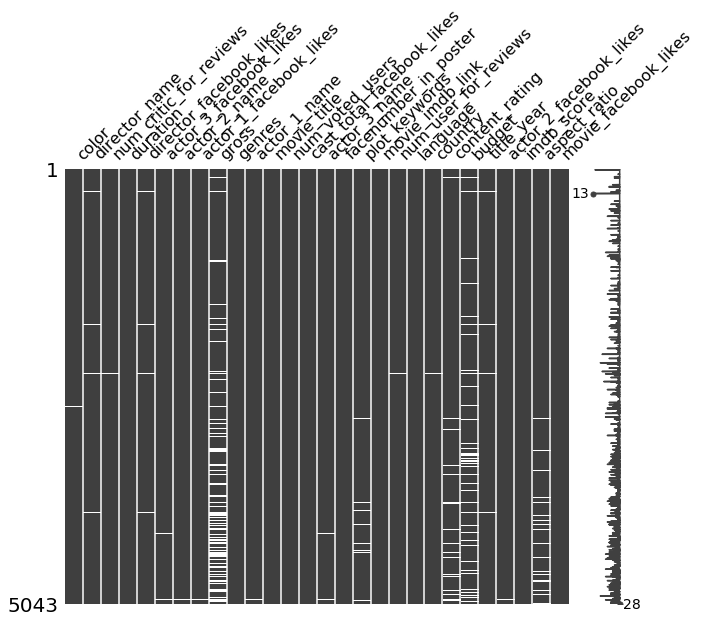

In [4]:
msno.matrix(df['raw'],figsize=(10,8))
plt.title('Missing value matrix');

The N/A mostly lies in the actor 1 facebook likes column and the budget column.  
The approach will be to investigate the result of just removing lines, and the result when the 2  columns mentioned above is removed before the N/A lines are removed.  
Also the link to imdb should be removed.

In [5]:
del df['raw']['movie_imdb_link']
del df['raw']['movie_title']
df['no_na_row'] = df['raw'].dropna()
df['no_na_col'] = pd.DataFrame.copy(df['raw'])
del df['no_na_col']['budget']

#Removing actor 1 facebook likes turn out to help very little.
#del df['no_na_col']['actor_1_facebook_likes']del df['no_na_col']['budget']del df['no_na_col']['budget']del df['no_na_col']['budget']


print('Before columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['raw'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['raw'].isnull().values.sum()/df['raw'].shape[0]))
print('\nAfter columns are removed')
print('Amount of lines containing N/A:\t\t{}'.format(df['no_na_col'].isnull().values.sum()))
print('Percent of lines containing N/A:\t{:.2f}%'.format(100*df['no_na_col'].isnull().values.sum()/df['no_na_col'].shape[0]))

df['no_na_col'] = df['no_na_col'].dropna()

Before columns are removed
Amount of lines containing N/A:		2698
Percent of lines containing N/A:	53.50%

After columns are removed
Amount of lines containing N/A:		2206
Percent of lines containing N/A:	43.74%


Now the data is cleaned, the text features should be k-coded

In [6]:
#find all numeric column labels
numeric_columns = df['no_na_row'].select_dtypes(include=[np.number]).columns.tolist()

#standardize each column
for column in numeric_columns:
    df['no_na_row'][column] = ((df['no_na_row'][column]-df['no_na_row'][column].mean())/df['no_na_row'][column].std())


numeric_columns = df['no_na_col'].select_dtypes(include=[np.number]).columns.tolist()
for column in numeric_columns:
    df['no_na_col'][column] = ((df['no_na_col'][column]-df['no_na_col'][column].mean())/df['no_na_col'][column].std())



/home/mattias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
df['no_na_row'].loc[3]

color                                                                    Color
director_name                                                Christopher Nolan
num_critic_for_reviews                                                 5.22974
duration                                                               2.37306
director_facebook_likes                                                6.90726
actor_3_facebook_likes                                                 11.7348
actor_2_name                                                    Christian Bale
actor_1_facebook_likes                                                  1.2403
gross                                                                  5.62471
genres                                                         Action|Thriller
actor_1_name                                                         Tom Hardy
num_voted_users                                                        6.83071
cast_total_facebook_likes                           

Removed columns:  
IMDB_link  
movie_title 


In [8]:
df['no_na_row']['director_name'].value_counts().head()

Steven Spielberg     25
Clint Eastwood       19
Woody Allen          19
Ridley Scott         17
Steven Soderbergh    16
Name: director_name, dtype: int64

In [9]:
#Maps atribute color as one hot notation 
d = {'Color': 1, ' Black and White': 0}
df['no_na_col']['Color'] = df['no_na_col']['color'].map(d)
df['no_na_row']['Color'] = df['no_na_row']['color'].map(d)
del df['no_na_col']['color']
del df['no_na_row']['color']

#Maps single column in one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['language'].str.get_dummies()],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['country'].str.get_dummies()],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['content_rating'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['language'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['country'].str.get_dummies()],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['content_rating'].str.get_dummies()],axis=1)

#Maps multiword attribute to one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'], df['no_na_row']['plot_keywords'].str.get_dummies(sep='|')],axis=1)
df['no_na_row'] = pd.concat([df['no_na_row'], df['no_na_row']['genres'].str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_row']['plot_keywords'].str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'], df['no_na_row']['genres'].str.get_dummies(sep='|')],axis=1)

#Maps multiple columns (actor 1,2,3) into "was he in the movie" one hot notation
df['no_na_row'] = pd.concat([df['no_na_row'],df['no_na_row']['actor_2_name'].map(str).str.cat(df['no_na_row']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_row']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)
df['no_na_col'] = pd.concat([df['no_na_col'],df['no_na_col']['actor_2_name'].map(str).str.cat(df['no_na_col']['actor_1_name'].map(str),sep='|').str.cat(df['no_na_col']['actor_3_name'].map(str),sep='|').str.get_dummies(sep='|')],axis=1)

#clean up
df['no_na_col'] = df['no_na_col'].drop(['genres','plot_keywords','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating' ],axis=1)
df['no_na_row'] = df['no_na_row'].drop(['genres','plot_keywords','actor_1_name','actor_2_name','actor_3_name','language',
                    'country','content_rating'],axis=1)

/home/mattias/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


For clustering, a version is made with a column "is steven spielberg director", and for the regression, a one hut of the directors are made.

In [10]:
#copy the dataframe to two new dataframes
df['c_no_na_row'] = pd.DataFrame.copy(df['no_na_row'])
df['c_no_na_col'] = pd.DataFrame.copy(df['no_na_col'])


#onehut of the director name for the row versions
df['c_no_na_row']['SS_director'] = (df['no_na_row']['director_name'].str.contains('Steven Spielberg', na=0))
df['r_no_na_row'] = pd.concat([df['no_na_row'], pd.get_dummies(df['no_na_row']['director_name'],prefix='Director_')], axis=1)

#onehot of the director for the column versions
df['c_no_na_col']['SS_director']=(df['no_na_col']['director_name'].str.contains('Steven Spielberg', na=0))
df['r_no_na_col'] = pd.concat([df['no_na_col'], pd.get_dummies(df['no_na_col']['director_name'],prefix='Director_')], axis=1)

#change false/true to 0/1
df['c_no_na_col']['SS_director'] = df['c_no_na_col']['SS_director'].astype(int)
df['c_no_na_row']['SS_director'] = df['c_no_na_row']['SS_director'].astype(int)

# drop column director name
del df['r_no_na_col']['director_name']
del df['c_no_na_col']['director_name']
del df['r_no_na_row']['director_name']
del df['c_no_na_row']['director_name']

Steven Spielberg is the director which occours most frequently in the dataset. It will be the focus to for the clustering, to cluster whether or not he directed the movie. There will be created 2 datasets, one for clustering and one for the regression part. One dataset will consist of a 

# Regression

The datasets used in creating a regression model for prediction are:
- df['r_no_na_row']
- df['r_no_na_col']

Where 'r' is for regression, 'no_na' for non containing N/A's. The last row/col indicates if the dataset has dropped all N/A's for all rows, or if the dataset has dropped two columns containing many N/A's and then all N/A's for all rows. The datasets have been interpreted and standardized.

In [11]:
print("Dataset containing all columns:")
df['r_no_na_row'].head()

Dataset containing all columns:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Director__Yarrow Cheney,Director__Yash Chopra,Director__Yimou Zhang,Director__Zach Braff,Director__Zach Cregger,Director__Zack Snyder,Director__Zak Penn,Director__Zal Batmanglij,Director__Álex de la Iglesia,Director__Émile Gaudreault
0,4.500709,2.991251,-0.263133,0.044197,-0.435027,10.067043,5.132866,-0.350018,-0.674620,6.607432,...,0,0,0,0,0,0,0,0,0,0
1,1.090477,2.593842,-0.079636,0.120745,2.077966,3.651865,2.403343,1.925665,-0.674620,2.191383,...,0,0,0,0,0,0,0,0,0,0
2,3.520571,1.666556,-0.263133,-0.322175,0.209330,2.097068,1.118432,0.009042,-0.184793,1.598038,...,0,0,0,0,0,0,0,0,0,0
3,5.229737,2.373060,6.907261,11.734841,1.240302,5.624713,6.830714,4.980181,-0.674620,5.749026,...,0,0,0,0,0,0,0,0,0,0
5,2.386527,0.960051,-0.108317,-0.127375,-0.458224,0.290763,0.699687,-0.504864,-0.184793,0.975511,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print("Dataset with two columns removed:")
df['r_no_na_col'].head()

Dataset with two columns removed:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,Director__Yash Chopra,Director__Yimou Zhang,Director__Yorgos Lanthimos,Director__Zach Braff,Director__Zach Cregger,Director__Zack Snyder,Director__Zak Penn,Director__Zal Batmanglij,Director__Álex de la Iglesia,Director__Émile Gaudreault
0,4.581015,3.050055,-0.258795,0.059074,-0.430279,10.265933,5.264992,-0.340424,-0.675710,6.760815,...,0,0,0,0,0,0,0,0,0,0
1,1.127608,2.647053,-0.071678,0.137648,2.126078,3.744148,2.480575,1.977169,-0.675710,2.262382,...,0,0,0,0,0,0,0,0,0,0
2,3.588469,1.706714,-0.258795,-0.316993,0.225197,2.163514,1.169822,0.025248,-0.182151,1.657967,...,0,0,0,0,0,0,0,0,0,0
3,5.319273,2.423162,7.053059,12.059098,1.273959,5.749781,6.996987,5.087940,-0.675710,5.886395,...,0,0,0,0,0,0,0,0,0,0
5,2.440067,0.990265,-0.100925,-0.117038,-0.453876,0.327193,0.742656,-0.498122,-0.182151,1.023827,...,0,0,0,0,0,0,0,0,0,0


## Problem formulation
Since the purpose of the website IMDB is to give a score to movies, a model is created for predicting the score of a movie from metadata of a movie. The actual values to predict are stored in the column 'imdb_score' and the values used for training the model are all the other columns in the datasets.

In [5]:
# Split dataset into input data and prediction data
X_row = df['r_no_na_row'].loc[:, df['r_no_na_row'].columns != 'imdb_score']
X_col = df['r_no_na_col'].loc[:, df['r_no_na_col'].columns != 'imdb_score']
y_row = df['r_no_na_row']['imdb_score']
y_col = df['r_no_na_col']['imdb_score']

NameError: name 'df' is not defined

## Apply linear regression with forward selection
Is transforming or combining attributes useful?
- It can be useful to plot the residual error vs. the attribute.

In [4]:
# Imports for feature selection and data splitting
from toolbox_02450 import feature_selector_lr
from sklearn.model_selection import train_test_split

# Split data into training data and test data
test_partition = 1/4

X_train_row, X_test_row, y_train_row, y_test_row = train_test_split(X_row, y_row, test_size=test_partition)
X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_col, y_col, test_size=test_partition)

# Apply forward feature selection
selected_features_row, features_record_row, loss_record_row = feature_selector_lr(X_train_row, y_train_row, cvf=10)
selected_features_col, features_record_col, loss_record_col = feature_selector_lr(X_train_col, y_train_col, cvf=10)

# Plot the residual error against the attribute



In [ ]:
# exercise 6.2.1
from matplotlib.pyplot import figure, plot, subplot, title, xlabel, ylabel, show, clim
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import cross_validation
from toolbox_02450 import feature_selector_lr, bmplot
import numpy as np

# Load data from matlab file
mat_data = loadmat('../Data/body.mat')
X = mat_data['X']
y = mat_data['y'].squeeze()
attributeNames = [name[0] for name in mat_data['attributeNames'][0]]
N, M = X.shape

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 5
CV = cross_validation.KFold(N,K,shuffle=True)

# Initialize variables
Features = np.zeros((M,K))
Error_train = np.empty((K,1))
Error_test = np.empty((K,1))
Error_train_fs = np.empty((K,1))
Error_test_fs = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))

k=0
for train_index, test_index in CV:
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    internal_cross_validation = 10
    
    # Compute squared error without using the input data at all
    Error_train_nofeatures[k] = np.square(y_train-y_train.mean()).sum()/y_train.shape[0]
    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum()/y_test.shape[0]

    # Compute squared error with all features selected (no feature selection)
    m = lm.LinearRegression(fit_intercept=True).fit(X_train, y_train)
    Error_train[k] = np.square(y_train-m.predict(X_train)).sum()/y_train.shape[0]
    Error_test[k] = np.square(y_test-m.predict(X_test)).sum()/y_test.shape[0]

    # Compute squared error with feature subset selection
    #textout = 'verbose';
    textout = '';
    selected_features, features_record, loss_record = feature_selector_lr(X_train, y_train, internal_cross_validation,display=textout)
    
    Features[selected_features,k]=1
    # .. alternatively you could use module sklearn.feature_selection
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
    else:
        m = lm.LinearRegression(fit_intercept=True).fit(X_train[:,selected_features], y_train)
        Error_train_fs[k] = np.square(y_train-m.predict(X_train[:,selected_features])).sum()/y_train.shape[0]
        Error_test_fs[k] = np.square(y_test-m.predict(X_test[:,selected_features])).sum()/y_test.shape[0]
    
        figure(k)
        subplot(1,2,1)
        plot(range(1,len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Squared error (crossvalidation)')    
        
        subplot(1,3,3)
        bmplot(attributeNames, range(1,features_record.shape[1]), -features_record[:,1:])
        clim(-1.5,0)
        xlabel('Iteration')

    print('Cross validation fold {0}/{1}'.format(k+1,K))
    print('Train indices: {0}'.format(train_index))
    print('Test indices: {0}'.format(test_index))
    print('Features no: {0}\n'.format(selected_features.size))

    k+=1


# Display results
print('\n')
print('Linear regression without feature selection:\n')
print('- Training error: {0}'.format(Error_train.mean()))
print('- Test error:     {0}'.format(Error_test.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test.sum())/Error_test_nofeatures.sum()))
print('Linear regression with feature selection:\n')
print('- Training error: {0}'.format(Error_train_fs.mean()))
print('- Test error:     {0}'.format(Error_test_fs.mean()))
print('- R^2 train:     {0}'.format((Error_train_nofeatures.sum()-Error_train_fs.sum())/Error_train_nofeatures.sum()))
print('- R^2 test:     {0}'.format((Error_test_nofeatures.sum()-Error_test_fs.sum())/Error_test_nofeatures.sum()))

figure(k)
subplot(1,3,2)
bmplot(attributeNames, range(1,Features.shape[1]+1), -Features)
clim(-1.5,0)
xlabel('Crossvalidation fold')
ylabel('Attribute')


# Inspect selected feature coefficients effect on the entire dataset and
# plot the fitted model residual error as function of each attribute to
# inspect for systematic structure in the residual

f=2 # cross-validation fold to inspect
ff=Features[:,f-1].nonzero()[0]
if len(ff) is 0:
    print('\nNo features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).' )
else:
    m = lm.LinearRegression(fit_intercept=True).fit(X[:,ff], y)
    
    y_est= m.predict(X[:,ff])
    residual=y-y_est
    
    figure(k+1)
    title('Residual error vs. Attributes for features selected in cross-validation fold {0}'.format(f))
    for i in range(0,len(ff)):
       subplot(2,np.ceil(len(ff)/2.0),i+1)
       plot(X[:,ff[i]],residual,'.')
       xlabel(attributeNames[ff[i]])
       ylabel('residual error')
    
    
    show() 

## Explain how a new observation is predicted
- Normalize

## Neural network model fitting

## Performance evalutation
Neural network vs. linear regression
- Use a paired t-test as described in lesson 6

# Classification

## Problem formulation
Describe the problem you want to solve.

## Apply three of the given methods
Two level cross validation

## Explain how a new observation is classified

## Performance evaluation